<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [34]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [35]:
print("Shape of Train: {}".format(train.shape))
print("Shape of Test: {}".format(test.shape))

Shape of Train: (60000, 785)
Shape of Test: (10000, 785)


In [36]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(train.columns)
print(test.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [39]:
X_train = train.drop('label', axis=1)
y_train = train['label']

In [40]:
X_test = test.drop('label', axis=1)
y_test = test['label']

In [41]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [42]:
y_train.shape, y_test.shape

((60000,), (10000,))

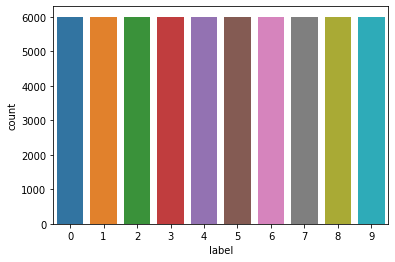

In [43]:
sns.countplot(train['label'])

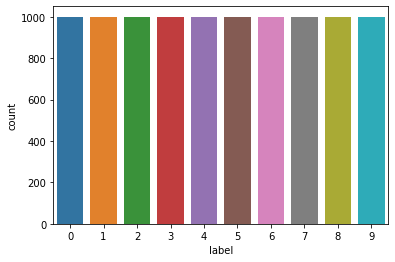

In [44]:
sns.countplot(test['label'])

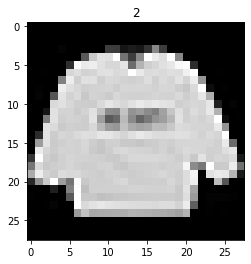

In [45]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(y_train[0])
plt.imshow(X_train.values.reshape(60000,28,28)[0],cmap="gray")

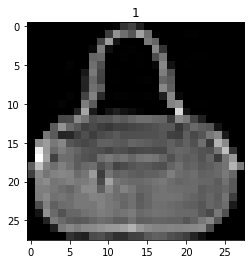

In [46]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(y_train[29])
plt.imshow(X_train.values.reshape(60000,28,28)[20],cmap="gray")

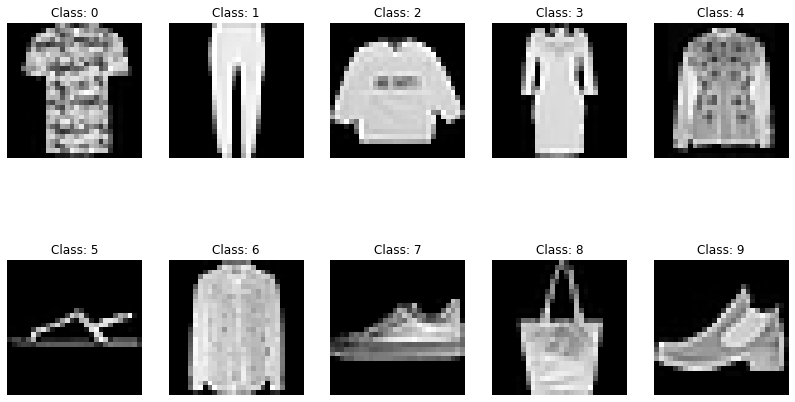

In [47]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

In [48]:
X_train = X_train/255.0
X_test = X_test/255.0

In [49]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [50]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [51]:
X_train = X_train.values.reshape(len(X_train), 28, 28, 1) # (28 x 28 = 784)
X_test = X_test.values.reshape(len(X_test), 28, 28, 1)

In [52]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [53]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [54]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [55]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_train, y_train, test_size=0.2, random_state=1234, stratify=y_train)

In [56]:
print(X_train_model.shape, X_test_model.shape, y_train_model.shape, y_test_model.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


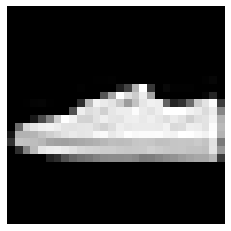

In [57]:
# Some examples
plt.imshow(X_train_model[10].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [58]:
from keras.models import load_model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

In [59]:
#0. Intitializing the Model
model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization()) # Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0

In [61]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
# Save the best weights
model_checkpoint = ModelCheckpoint(filepath="Fashion_MNIST_Model-1.h5", verbose=1, save_best_only=True)

In [63]:
# Early stoppings
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [64]:
history = model.fit(X_train_model, y_train_model, validation_data=(X_test_model, y_test_model), batch_size=100, epochs=10, callbacks=[callbacks, model_checkpoint] ) 

Epoch 1/10
476/480 [============================>.] - ETA: 0s - loss: 0.3492 - accuracy: 0.8749
Epoch 1: val_loss improved from inf to 0.37270, saving model to Fashion_MNIST_Model-1.h5
480/480 [==============================] - 19s 11ms/step - loss: 0.3484 - accuracy: 0.8752 - val_loss: 0.3727 - val_accuracy: 0.8646
Epoch 2/10
476/480 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9196
Epoch 2: val_loss improved from 0.37270 to 0.24057, saving model to Fashion_MNIST_Model-1.h5
480/480 [==============================] - 5s 10ms/step - loss: 0.2240 - accuracy: 0.9196 - val_loss: 0.2406 - val_accuracy: 0.9112
Epoch 3/10
477/480 [============================>.] - ETA: 0s - loss: 0.1816 - accuracy: 0.9337
Epoch 3: val_loss improved from 0.24057 to 0.22897, saving model to Fashion_MNIST_Model-1.h5
480/480 [==============================] - 5s 10ms/step - loss: 0.1816 - accuracy: 0.9336 - val_loss: 0.2290 - val_accuracy: 0.9193
Epoch 4/10
480/480 [====================

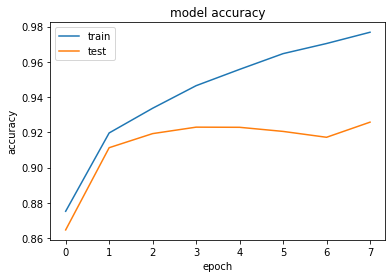

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

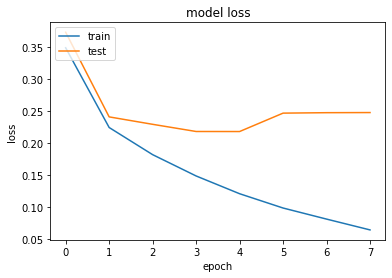

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
print('Train accuracy of the First model: ',history.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history.history['val_accuracy'][-1])
print('Train loss of the First model: ',history.history['loss'][-1])
print('Validation loss of the First model: ',history.history['val_loss'][-1])

Train accuracy of the First model:  0.9767916798591614
Validation accuracy of the First model:  0.9257500171661377
Train loss of the First model:  0.06412182003259659
Validation loss of the First model:  0.2473251074552536


In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.2412509322166443
Test Accuracy: 0.9265999794006348


In [70]:
saved_model = load_model('Fashion_MNIST_Model-1.h5')
y_test_pred = saved_model.predict(X_test)
y_test_pred

array([[9.99915123e-01, 2.46218548e-08, 4.31289045e-05, ...,
        2.57753960e-08, 2.89977635e-07, 1.25410904e-09],
       [1.18570588e-05, 9.99734223e-01, 6.79521327e-05, ...,
        3.61770935e-06, 1.60478794e-05, 2.52711828e-07],
       [2.50335247e-03, 2.58510170e-07, 9.23498809e-01, ...,
        1.15179404e-07, 7.13901818e-06, 2.40062172e-06],
       ...,
       [3.66070479e-10, 1.45900571e-13, 4.00471628e-10, ...,
        3.06355223e-12, 1.00000000e+00, 1.85519291e-11],
       [1.19152003e-06, 1.32331337e-08, 4.85795084e-08, ...,
        1.15873344e-09, 9.99993324e-01, 1.22231057e-07],
       [9.12218384e-05, 9.91133511e-01, 8.76587801e-05, ...,
        1.48025583e-06, 1.90729660e-03, 1.87283808e-06]], dtype=float32)

In [71]:
y_test_pred = np.argmax(y_test_pred, 1)
y_test_pred

array([0, 1, 2, ..., 8, 8, 1])

In [72]:
y_test

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,1,0,0,0
9997,0,0,0,0,0,0,0,0,1,0
9998,0,0,0,0,0,0,0,0,1,0


In [73]:
y_test = y_test.values
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [74]:
y_test_true = np.argmax(y_test, axis=1)
y_test_true

array([0, 1, 2, ..., 8, 8, 1])

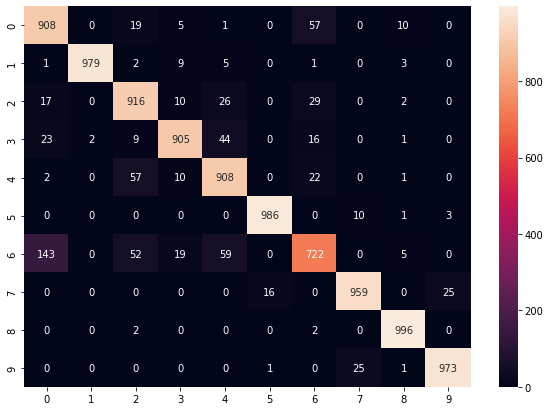

In [75]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [76]:
accuracy = accuracy_score(y_test_true, y_test_pred)
class_report = classification_report(y_test_true, y_test_pred)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

accuracy: 0.9252
classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.92      0.89      1000
           3       0.94      0.91      0.92      1000
           4       0.87      0.91      0.89      1000
           5       0.98      0.99      0.98      1000
           6       0.85      0.72      0.78      1000
           7       0.96      0.96      0.96      1000
           8       0.98      1.00      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



### Using Image Data Generator

In [77]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,               # set input mean to 0 over the dataset
        samplewise_center=False,                # set each sample mean to 0
        featurewise_std_normalization=False,    # divide inputs by std of the dataset
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # dimesion reduction
        rotation_range=0.1,                     # randomly rotate images in the range
        zoom_range = 0.1,                       # Randomly zoom image
        width_shift_range=0.1,                  # randomly shift images horizontally
        height_shift_range=0.1,                 # randomly shift images vertically
        horizontal_flip=True,                   # randomly flip images
        vertical_flip=True)                     # randomly flip images

datagen.fit(X_train_model)

In [78]:
history_2 = model.fit_generator(datagen.flow(X_train_model, y_train_model, batch_size=100), shuffle=True, epochs=20, validation_data=(X_test_model, y_test_model), verbose=2, steps_per_epoch=100)

Epoch 1/20
100/100 - 4s - loss: 0.8602 - accuracy: 0.7296 - val_loss: 0.8474 - val_accuracy: 0.7421 - 4s/epoch - 45ms/step
Epoch 2/20
100/100 - 5s - loss: 0.5462 - accuracy: 0.8053 - val_loss: 0.3125 - val_accuracy: 0.8874 - 5s/epoch - 49ms/step
Epoch 3/20
100/100 - 6s - loss: 0.4891 - accuracy: 0.8251 - val_loss: 0.2902 - val_accuracy: 0.8946 - 6s/epoch - 60ms/step
Epoch 4/20
100/100 - 6s - loss: 0.4685 - accuracy: 0.8316 - val_loss: 0.3343 - val_accuracy: 0.8758 - 6s/epoch - 60ms/step
Epoch 5/20
100/100 - 4s - loss: 0.4498 - accuracy: 0.8379 - val_loss: 0.2918 - val_accuracy: 0.8934 - 4s/epoch - 39ms/step
Epoch 6/20
100/100 - 4s - loss: 0.4066 - accuracy: 0.8536 - val_loss: 0.2626 - val_accuracy: 0.9034 - 4s/epoch - 39ms/step
Epoch 7/20
100/100 - 4s - loss: 0.3942 - accuracy: 0.8570 - val_loss: 0.2948 - val_accuracy: 0.8925 - 4s/epoch - 39ms/step
Epoch 8/20
100/100 - 4s - loss: 0.3974 - accuracy: 0.8532 - val_loss: 0.2897 - val_accuracy: 0.8933 - 4s/epoch - 38ms/step
Epoch 9/20
100/1

In [79]:
model.save('Fashion_MNIST_Model-2.h5')

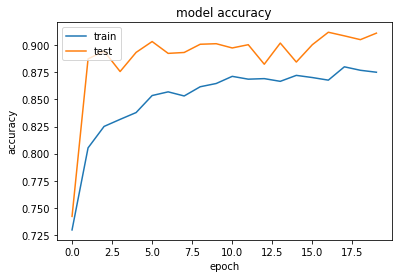

In [80]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

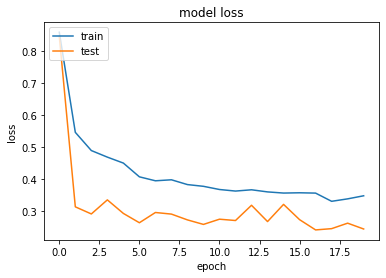

In [81]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
print('Train accuracy of the First model: ',history_2.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history_2.history['val_accuracy'][-1])
print('Train loss of the First model: ',history_2.history['loss'][-1])
print('Validation loss of the First model: ',history_2.history['val_loss'][-1])

Train accuracy of the First model:  0.8751000165939331
Validation accuracy of the First model:  0.9111666679382324
Train loss of the First model:  0.3472045063972473
Validation loss of the First model:  0.24300113320350647


In [83]:
score = model.evaluate(X_test,y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.22744120657444
Test Accuracy: 0.9175999760627747


In [85]:
saved_model = load_model('Fashion_MNIST_Model-2.h5')
y_test_pred = saved_model.predict(X_test)
y_test_pred

array([[9.95541871e-01, 1.39599692e-07, 1.08820817e-03, ...,
        1.52985553e-08, 1.28949141e-05, 1.29679464e-07],
       [3.64248492e-10, 1.00000000e+00, 2.87839804e-11, ...,
        6.73148982e-13, 2.00475059e-09, 7.02408010e-12],
       [5.80707041e-04, 4.60655656e-07, 9.83670831e-01, ...,
        2.08728608e-08, 1.52906284e-06, 6.36682529e-08],
       ...,
       [3.84512013e-08, 1.33210576e-09, 5.89295013e-09, ...,
        1.85468016e-10, 9.99999523e-01, 2.58796784e-09],
       [1.64793542e-04, 6.80300309e-06, 4.08230007e-05, ...,
        1.17743824e-07, 9.99594986e-01, 4.63263541e-06],
       [2.39775470e-03, 9.41340923e-01, 3.44366091e-03, ...,
        9.43940613e-05, 2.92479992e-03, 1.64203136e-03]], dtype=float32)

In [86]:
y_test_pred = np.argmax(y_test_pred, 1)
y_test_pred

array([0, 1, 2, ..., 8, 8, 1])

In [87]:
y_test_true = np.argmax(y_test, axis=1)

In [88]:
y_test_true

array([0, 1, 2, ..., 8, 8, 1])

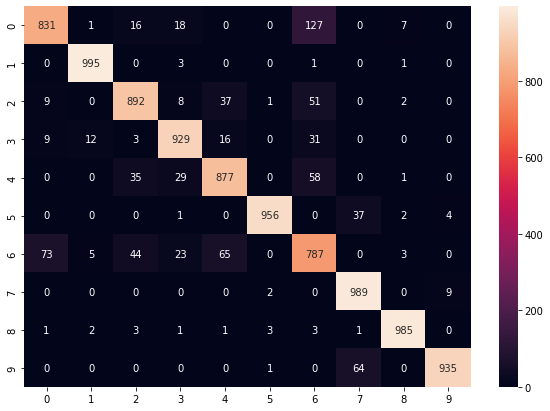

In [89]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [90]:
accuracy = accuracy_score(y_test_true, y_test_pred)
class_report = classification_report(y_test_true, y_test_pred)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

accuracy: 0.9176
classification report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.90      0.89      0.90      1000
           3       0.92      0.93      0.92      1000
           4       0.88      0.88      0.88      1000
           5       0.99      0.96      0.97      1000
           6       0.74      0.79      0.76      1000
           7       0.91      0.99      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

